In [67]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from matplotlib import style

style.use("ggplot")

In [38]:
with open("data/tickers.pickle", "rb") as f:
    df = pickle.load(f)

<Axes: xlabel='Date'>

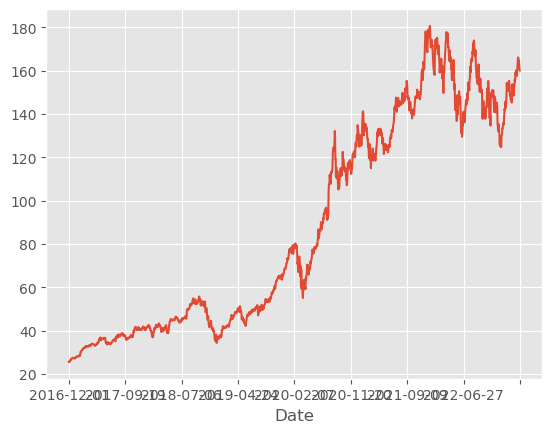

In [39]:
df["AAPL"].plot()

In [40]:
df.corr()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
MMM,1.000000,0.223422,-0.274271,-0.411952,-0.245674,-0.005766,-0.460328,-0.062685,-0.436722,-0.085617,...,-0.334269,-0.474779,0.659650,-0.477805,-0.054944,-0.320860,-0.009795,0.145452,0.153649,-0.278485
AOS,0.223422,1.000000,0.593058,0.653062,0.728021,0.593011,0.601689,0.590439,0.579921,0.539140,...,0.574646,0.626774,0.024759,0.398243,0.719628,0.608849,0.711697,0.357918,0.753017,0.624800
ABT,-0.274271,0.593058,1.000000,0.755977,0.955567,0.674825,0.700625,0.924003,0.873908,0.714164,...,0.936711,0.812471,-0.488458,0.918654,0.878846,0.900315,0.919618,0.605066,0.539014,0.977318
ABBV,-0.411952,0.653062,0.755977,1.000000,0.825807,0.645751,0.944028,0.556759,0.884489,0.516141,...,0.776883,0.923990,-0.421829,0.753831,0.691668,0.798486,0.606524,0.221636,0.620094,0.742661
ACN,-0.245674,0.728021,0.955567,0.825807,1.000000,0.644823,0.794114,0.885230,0.915451,0.776655,...,0.908233,0.858735,-0.478343,0.864569,0.895316,0.913274,0.919193,0.513450,0.677564,0.968990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.320860,0.608849,0.900315,0.798486,0.913274,0.512360,0.770889,0.768554,0.940838,0.681937,...,0.915062,0.866131,-0.374223,0.866239,0.888029,1.000000,0.807679,0.517670,0.609440,0.893807
ZBRA,-0.009795,0.711697,0.919618,0.606524,0.919193,0.642459,0.566286,0.947491,0.751467,0.778009,...,0.838147,0.679940,-0.335218,0.751502,0.895024,0.807679,1.000000,0.674870,0.622055,0.929015
ZBH,0.145452,0.357918,0.605066,0.221636,0.513450,0.568882,0.195483,0.663191,0.387111,0.389689,...,0.633626,0.346346,0.035370,0.531799,0.637849,0.517670,0.674870,1.000000,0.246814,0.579892
ZION,0.153649,0.753017,0.539014,0.620094,0.677564,0.377891,0.648241,0.454657,0.637807,0.690045,...,0.505303,0.561401,-0.011806,0.364346,0.613583,0.609440,0.622055,0.246814,1.000000,0.544042


In [41]:
tickers = df.columns.values.tolist()


def get_shifted_ticker(ticker, window=7):
    df_without_na = df.fillna(0)

    for i in range(1, window + 1):
        df_without_na["{}_{}d".format(ticker, i)] = (
            df_without_na[ticker].shift(-i) - df_without_na[ticker]
        ) / df_without_na[ticker]

    df_without_na = df_without_na.fillna(0)
    return df_without_na

In [42]:
def map_direction(*args):
    cols = [c for c in args]
    requirements = 0.02
    for col in cols:
        if col > requirements:
            return 1
        if col < -requirements:
            return -1
    return 0

In [61]:
ticker = "AAPL"
df_shifted_aapl = get_shifted_ticker(ticker)
df_shifted_aapl.head()

f = map(lambda x: df_shifted_aapl["{}_{}d".format(ticker, x)], *[range(1, 8)])

df_shifted_aapl["{}_target".format(ticker)] = list(map(map_direction, *list(f)))
df_shifted_aapl.head()

/tmp/ipykernel_21529/1055310554.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_without_na['{}_{}d'.format(ticker, i)] = (df_without_na[ticker].shift(-i) - df_without_na[ticker]) / df_without_na[ticker]
/tmp/ipykernel_21529/1055310554.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_without_na['{}_{}d'.format(ticker, i)] = (df_without_na[ticker].shift(-i) - df_without_na[ticker]) / df_without_na[ticker]
/tmp/ipykernel_21529/1055310554.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,ZION,ZTS,AAPL_target,AAPL_1d,AAPL_2d,AAPL_3d,AAPL_4d,AAPL_5d,AAPL_6d,AAPL_7d
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-01,140.629654,44.157623,33.693954,44.825001,106.448090,34.302727,37.159481,99.510002,83.552208,160.134644,...,34.625267,47.216072,1,0.003745,-0.003471,0.004201,0.014065,0.024020,0.040734,0.034798
2016-12-02,140.466690,44.373943,33.962795,45.029575,106.113327,34.428059,36.899517,99.730003,83.089828,159.553268,...,34.479595,47.158447,1,-0.007188,0.000455,0.010282,0.020200,0.036852,0.030937,0.048135
2016-12-05,139.806824,44.977859,34.437725,46.113075,106.502357,35.170418,36.815647,101.949997,83.796501,159.919006,...,34.745235,47.849976,1,0.007699,0.017597,0.027587,0.044359,0.038401,0.055724,0.055724
2016-12-06,139.953476,45.140102,34.428745,46.688908,107.126625,35.382515,37.469784,101.550003,83.752876,162.526001,...,35.919094,48.234161,1,0.009823,0.019736,0.036380,0.030468,0.047658,0.047658,0.053388
2016-12-07,143.415634,45.744007,34.482540,45.453888,109.985497,36.105595,37.905861,103.360001,85.631020,165.780045,...,36.236145,49.233044,1,0.009817,0.026299,0.020445,0.037467,0.037467,0.043141,0.044492


In [69]:
vals = df_shifted_aapl["{}_target".format(ticker)].values
str_val = [str(i) for i in vals]
print("Data Spread", Counter(str_val))

df_shifted_aapl_clean = df_shifted_aapl.fillna(0)
df_shifted_aapl_clean = df_shifted_aapl_clean.replace([np.inf, -np.inf], np.nan)
df_shifted_aapl_clean = df_shifted_aapl_clean.dropna()

df_vals = df_shifted_aapl[[ticker for ticker in tickers]].pct_change()
df_vals.head()

Data Spread Counter({'1': 845, '-1': 540, '0': 215})


,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-02,-0.001159,0.004899,0.007979,0.004564,-0.003145,0.003654,-0.006996,0.002211,-0.005534,-0.003631,...,-0.012189,-0.006051,-0.006346,0.005189,-0.000193,-0.004307,0.019651,0.004109,-0.004207,-0.001220
2016-12-05,-0.004698,0.013610,0.013984,0.024062,0.003666,0.021563,-0.002273,0.022260,0.008505,0.002292,...,0.012840,-0.005242,-0.002737,0.001290,-0.001544,0.010253,0.033057,0.012276,0.007704,0.014664
2016-12-06,0.001049,0.003607,-0.000261,0.012487,0.005862,0.006031,0.017768,-0.003923,-0.000521,0.016302,...,0.027000,0.004292,0.038731,-0.000515,0.008701,0.006343,0.008278,0.031351,0.033785,0.008029
2016-12-07,0.024738,0.013378,0.001563,-0.026452,0.026687,0.020436,0.011638,0.017824,0.022425,0.020022,...,-0.000080,0.003343,-0.001860,0.014959,-0.002108,0.015443,0.016052,-0.001816,0.008827,0.020709
